# Задание 1

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

$p'(x) = [x_0, x_1]f + [x_0, x_1, x_2]f \cdot ( x - x_0 + x - x_1)$ -- производная с точностью 2 порядка, раскрывая разделённые разности получаем

$[x_0, x_1] f = \frac{(f(x_1) - f(x_0)}{x_1 -x_0} = \frac{(f(x_1) - f(x_0)}{h/\alpha}$

$[x_0, x_1, x_2] f = \frac{f(x_2) - f(x_0)}{h^2\alpha^2 + h^2} - \frac{f(x_1) - f(x_0)}{h^2}$ 

$p'(x) = \frac{f(x_1) - f(x_0)}{h/\alpha} + (\frac{f(x_2) - f(x_0)}{h^2\alpha^2 + h^2} - \frac{f(x_1) - f(x_0)}{h^2}) \cdot (2x - 2x_0 + \frac{h}{\alpha})$ 

$p'(x_0) = \frac{f(x_1) - f(x_0)}{h/\alpha} + (\frac{f(x_2) - f(x_0)}{h\alpha^2 + h} - \frac{f(x_1) - f(x_0)}{h}) \cdot \frac{1}{\alpha} = \frac{1}{h} \cdot ( (f(x_1) - f(x_0)) \cdot (\alpha - \frac{1}{\alpha}) + \frac{f(x_2) - f(x_0)}{\alpha^3 + \alpha})$ 

Берём в качестве  $f$  $sin(x)$, $\alpha = [1, 1.5, 2]$, $h = 10^{-3}$, тогда $f'(x) = cos(x)$ 

In [3]:
x_0 = 2


def f(x):
    return np.sin(x)


def df(x):
    return np.cos(x)


def func(a, h):
    x = [x_0 - h / a, x_0, x_0 + h * a]
    return ((f(x[1]) - f(x[0])) * (a - 1 / a) + (f(x[2]) - f(x[0])) / (a ** 3 + a)) / h

In [4]:
step = 10 ** (-3)

def plot_error():
    h = [i * 10 ** (-8) for i in range(1, 10 ** 8 + 1, 10 ** 3)]
    a = [1, 1.5, 2]
    for a_i in a:
        diff = [abs(df(x_0) - func(a_i, h_i)) for h_i in h]
        plt.plot(h, diff, label='alpha=' + str(a_i))
    plt.xlabel('h')
    plt.ylabel('abs(df(x) - p\'(x))')
    plt.title('Difference, x_0 = ' + str(x_0))
    plt.legend()
    plt.show()  


def plot_error_extended():
    h = [i * 10 ** (-8) for i in range(1, 10 ** 9 + 1, 10 ** 3)]
    a = [1, 1.5, 2]
    for a_i in a:
        diff = [abs(df(x_0) - func(a_i, h_i)) for h_i in h]
        plt.plot(h, diff, label='alpha=' + str(a_i))
    plt.xlabel('h')
    plt.ylabel('abs(df(x) - p\'(x))')
    plt.title('Difference, x_0 = ' + str(x_0))
    plt.legend()
    plt.show()  

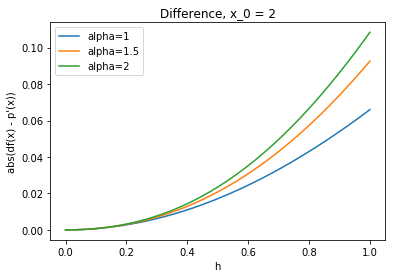

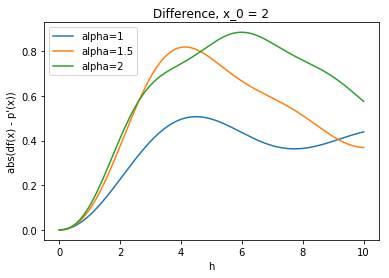

In [5]:
plot_error()
plot_error_extended()

Как видим, погрешности ведут себя как $O(\alpha^2h^2)$, что согласуется с лекцией, так как это максимальное расстояние между узлами( коэффицент, на который мы домножаем, равен какой-то константе, так как производная ограничена), но с какого-то момента они полностью перестают вести себя как параболы, что говорит о том, что оценка достаточно грубая. Также при увеличении $\alpha$ почти всегда увеличивается ошибка, в некоторых местах видимо оценка тоже не достигается, поэтому иногда при большем $\alpha$ ошибка может быть меньше.

# Задание 2

## 2 a)

Точное значение -- $ \frac{1}{3} ( arctan(3) + arctan(15))$

In [6]:
a = -1
b = 5

def func(x):
    return 1 / (1 + 9 * x ** 2)


integral = (np.arctan(3) + np.arctan(15)) / 3


def integral_trapezium(h):
    return h * (func(a) / 2 + sum([func(a + h * i) for i in range(1, int((b - a) / h))]) + func(b) / 2)


def integral_simpson(h):
    return h / 6 * (func(a) + sum([4 * func(a + h / 2 * i) for i in range(1, 2 * int((b - a) / h), 2)]) + 
                   sum([2 * func(a + h / 2 * i) for i in range(2, 2 * int((b - a) / h), 2)]) + func(b))

In [11]:
def plot_error():
    m = range(1, 10 ** 3)
    h = [(b - a) / i for i in m]
    diff_tr = [np.log10(abs(integral - integral_trapezium(h_i))) for h_i in h]
    diff_sim = [np.log10(abs(integral - integral_simpson(h_i))) for h_i in h]
    plt.plot(m, diff_tr, label='trapezium')
    plt.plot(m, diff_sim, label='simpson')
    plt.xlabel('M')
    plt.ylabel('log(error)')
    plt.title('Difference')
    plt.legend()
    plt.show()  

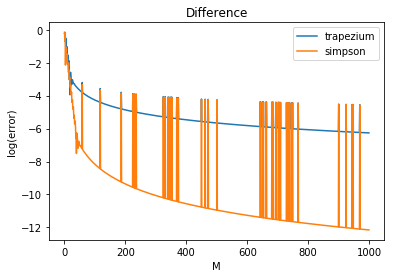

In [12]:
plot_error()